### Question 1

In [2]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Generating the dataset using Binomial Distribution
np.random.seed(42)
n = 100  # Total products
p = 0.1  # Probability of a product being defective
data = np.random.binomial(1, p, n)
outcome_map = {1: 'Defective', 0: 'Non-Defective'}
data = [outcome_map[i] for i in data]

df = pd.DataFrame(data, columns=['Quality Check Outcome'])

# Display the first few rows of the dataframe
df.head()

,Quality Check Outcome
0,Non-Defective
1,Defective
2,Non-Defective
3,Non-Defective
4,Non-Defective


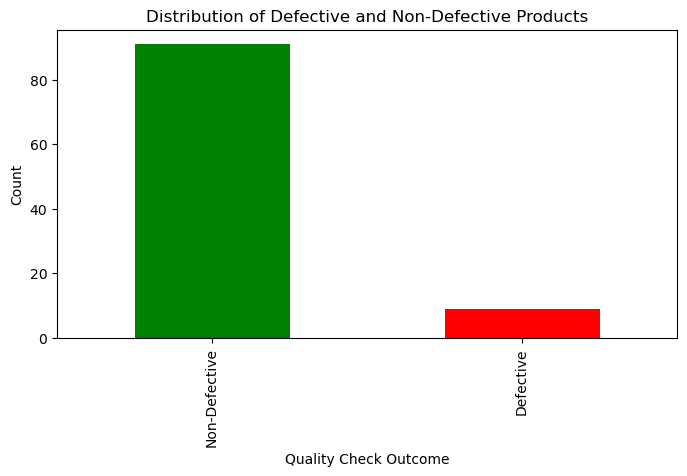

In [6]:
# Bar chart
plt.figure(figsize=(8, 4))
df['Quality Check Outcome'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.title('Distribution of Defective and Non-Defective Products')
plt.xlabel('Quality Check Outcome')
plt.ylabel('Count')
plt.show()

In [4]:
# Estimate the value of p
estimated_p = df['Quality Check Outcome'].value_counts(normalize=True)['Defective']

print(f"Estimated probability of a product being defective (p): {estimated_p}")

Estimated probability of a product being defective (p): 0.09


In [7]:
# Calculate the probability of more than 10 defective products in the next 50
num_defective = 10
num_trials = 50
probability_more_than_10_defective = round(1 - binom.cdf(num_defective, num_trials, estimated_p), 5)

print(f"Probability that more than 10 out of the next 50 products will be defective: {probability_more_than_10_defective}")

Probability that more than 10 out of the next 50 products will be defective: 0.00428


Interpretation:

The estimated probability of 0.09 suggests that, on average, approximately 9% of the products in the dataset are defective. This implies a relatively low defect rate in the simulated dataset. The distribution of defective products appears to be skewed towards the non-defective side, indicating that most products pass the quality check.

### Question 2

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

# Generating the dataset using Poisson Distribution
np.random.seed(42)
lambda_value = 5  # Average number of customers arriving per hour
hours = list(range(1, 25))
data = np.random.poisson(lambda_value, 24)

df = pd.DataFrame({'Hour': hours, 'Number of Customers': data})

# Display the first few rows of the dataframe
df.head()

,Hour,Number of Customers
0,1,5
1,2,4
2,3,4
3,4,5
4,5,5


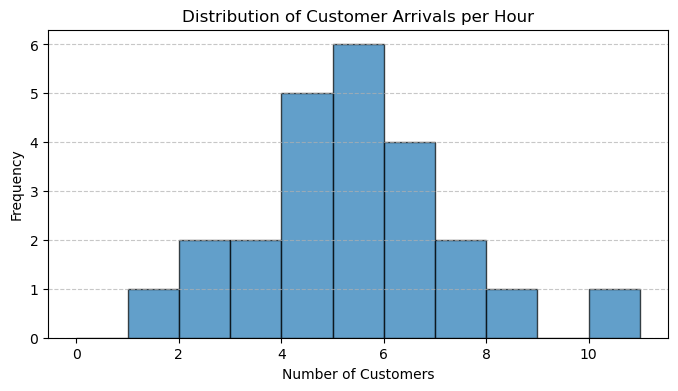

In [19]:
# Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['Number of Customers'], bins=range(0, max(df['Number of Customers']) + 1), edgecolor='black', alpha=0.7)
plt.title('Distribution of Customer Arrivals per Hour')
plt.xlabel('Number of Customers')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [10]:
# Estimate the average rate (λ)
estimated_lambda = df['Number of Customers'].mean()

print(f"Estimated average rate of customer arrivals per hour (λ): {estimated_lambda}")

Estimated average rate of customer arrivals per hour (λ): 4.916666666666667


In [11]:
# Calculate the probability of more than 10 customers arriving in a given hour
num_customers = 10
probability_more_than_10_customers = 1 - poisson.cdf(num_customers, estimated_lambda)

print(f"Probability that more than 10 customers will arrive in a given hour: {probability_more_than_10_customers:.5f}")

Probability that more than 10 customers will arrive in a given hour: 0.01225


Interpretation:

The dataset suggests an average rate of 4.92 customer arrivals per hour, indicating a moderate flow. With a low probability of 0.01225 for more than 10 arrivals in an hour, rare instances of high customer traffic are implied. The right-skewed Poisson distribution implies most hours have fewer arrivals, offering predictability. This distribution aids businesses in resource planning, foreseeing occasional deviations from the average. Overall, the data reflects a pattern of manageable customer flow with occasional spikes.

### Question 3

In [21]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import expon

# Generating the dataset using Exponential Distribution
np.random.seed(42)
lambda_value = 2  # Average number of reqests per minute
data = np.random.exponential(1/lambda_value, 1000)

df = pd.DataFrame(data, columns=['Time Between Requests (minutes)'])

# Display the first few rows of the dataframe
df.head()

,Time Between Requests (minutes)
0,0.234634
1,1.505061
2,0.658373
3,0.456471
4,0.084812


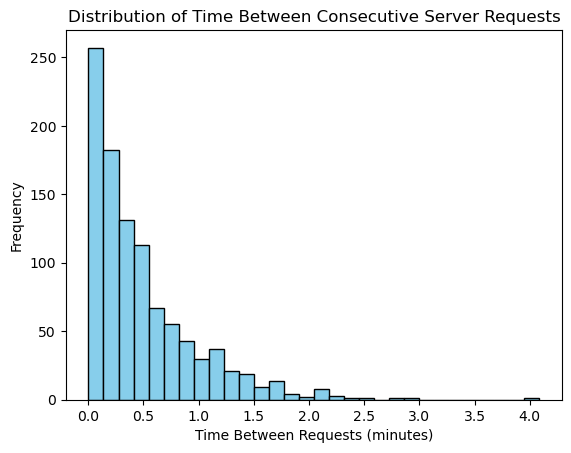

In [22]:
# Plotting a histogram
plt.hist(df['Time Between Requests (minutes)'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Time Between Consecutive Server Requests')
plt.xlabel('Time Between Requests (minutes)')
plt.ylabel('Frequency')
plt.show()

In [14]:
# Estimate λ using the inverse of the sample mean
lambda_estimate = 1 / df['Time Between Requests (minutes)'].mean()
print(f"Estimated rate parameter (λ): {lambda_estimate}")

Estimated rate parameter (λ): 2.0565426917795238


In [15]:
# Calculate the probability using the estimated λ
probability_exceed_2_minutes = 1 - expon.cdf(2, scale=1/lambda_estimate)
print(f"Probability of time between requests exceeding 2 minutes: {probability_exceed_2_minutes}")

Probability of time between requests exceeding 2 minutes: 0.016357228265927337


In [16]:
# Determine the time using the percent-point function (inverse cumulative distribution function)
time_for_90_percent = expon.ppf(0.9, scale=1/lambda_estimate)
print(f"Time by which 90% of requests would have already arrived: {time_for_90_percent} minutes")

Time by which 90% of requests would have already arrived: 1.1196388493163845 minutes


Interpretation:

The dataset reveals an exponential distribution of time intervals between server requests, with an estimated rate parameter (λ) of 2.06, signifying a rapid average request rate. The low probability (0.0164) of intervals exceeding 2 minutes suggests predominantly short intervals. Within approximately 1.12 minutes post a previous request, 90% of subsequent requests are expected, highlighting the server's quick responsiveness. This distribution informs efficient resource management and underscores the consistent nature of server interactions.